In [4]:
# Import necessary libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from datetime import datetime
import os

In [6]:
# Set up paths
root_dir = Path('/Users/andreashill/Desktop/GitHub/TrackTrend')
source_db_path = root_dir / 'data' / 'spotify_tracks.db'
processed_csv_path = root_dir / 'data' / 'spotify_tracks_processed.csv'

In [8]:
# Connect to the database and load data
conn = sqlite3.connect(source_db_path)
query = "SELECT * FROM tracks"
df = pd.read_sql_query(query, conn)
conn.close()
print(f"Loaded {len(df)} rows from source database.")

Loaded 300 rows from source database.


In [10]:
if df.empty:
    print("No data to process.")
    exit()

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [12]:
# Process data
df['rank'] = pd.to_numeric(df['rank'], downcast='integer')
df['popularity'] = pd.to_numeric(df['popularity'], downcast='integer')
df['duration_minutes'] = df['duration_ms'] / 60000

In [14]:
# Normalize features
features_to_normalize = ['danceability', 'energy', 'loudness', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[features_to_normalize])
normalized_column_names = [f"{feature}_normalized" for feature in features_to_normalize]
df[normalized_column_names] = normalized_features

# Save processed data to CSV
df.to_csv(processed_csv_path, index=False)
print(f"Processed and saved {len(df)} entries to CSV.")

Processed and saved 300 entries to CSV.


In [16]:
# Compute and save correlations
corr_matrix = df[normalized_column_names].corr()
corr_df = corr_matrix.reset_index()
corr_melted = pd.melt(corr_df, id_vars='index', var_name='feature2', value_name='correlation')
corr_melted.columns = ['feature1', 'feature2', 'correlation']
corr_csv_path = root_dir / 'data' / 'feature_correlations.csv'
corr_melted.to_csv(corr_csv_path, index=False)

print("Correlation data saved to CSV.")

Correlation data saved to CSV.


In [18]:
# Data analysis and visualization
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         300 non-null    datetime64[ns]
 1   rank                         300 non-null    int8          
 2   track_id                     300 non-null    object        
 3   name                         300 non-null    object        
 4   artist                       300 non-null    object        
 5   popularity                   300 non-null    int8          
 6   danceability                 300 non-null    float64       
 7   energy                       300 non-null    float64       
 8   key                          300 non-null    int64         
 9   loudness                     300 non-null    float64       
 10  mode                         300 non-null    int64         
 11  speechiness                 

In [20]:
print("\nSample Data:")
print(df.head())


Sample Data:
         date  rank                track_id              name  \
0  2024-09-05     1  2plbrEY59IikOBgBGLjaoe  Die With A Smile   
27 2024-09-05    28  102YUQbYmwdBXS7jwamI90       Good Graces   
28 2024-09-05    29  5XeFesFbtLpXzIVDNQP22n  I Wanna Be Yours   
29 2024-09-05    30  1BJJbSX6muJVF2AK7uH1x4              Move   
30 2024-09-05    31  4xdBrk0nFZaP54vvZj0yx7        HOT TO GO!   

               artist  popularity  danceability  energy  key  loudness  ...  \
0           Lady Gaga          96         0.521   0.592    6    -7.777  ...   
27  Sabrina Carpenter          88         0.758   0.759    5    -5.315  ...   
28     Arctic Monkeys          91         0.464   0.417    0    -9.345  ...   
29          Adam Port          91         0.727   0.782    8    -8.529  ...   
30      Chappell Roan          91         0.742   0.757    6    -4.981  ...   

    duration_minutes  danceability_normalized  energy_normalized  \
0           4.194467                 0.389394       

In [22]:
print("\nMemory Usage:")
print(df.memory_usage(deep=True))


Memory Usage:
Index                           2400
date                            2400
rank                             300
track_id                       23700
name                           22387
artist                         20394
popularity                       300
danceability                    2400
energy                          2400
key                             2400
loudness                        2400
mode                            2400
speechiness                     2400
acousticness                    2400
instrumentalness                2400
liveness                        2400
valence                         2400
tempo                           2400
duration_ms                     2400
time_signature                  2400
duration_minutes                2400
danceability_normalized         2400
energy_normalized               2400
loudness_normalized             2400
speechiness_normalized          2400
acousticness_normalized         2400
instrumentalness_normal

In [24]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date                           0
rank                           0
track_id                       0
name                           0
artist                         0
popularity                     0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
time_signature                 0
duration_minutes               0
danceability_normalized        0
energy_normalized              0
loudness_normalized            0
speechiness_normalized         0
acousticness_normalized        0
instrumentalness_normalized    0
liveness_normalized            0
valence_normalized             0
tempo_normalized               0
dtype: int64


In [26]:
print("\nNumerical Features Summary:")
print(df.describe())


Numerical Features Summary:
                      date        rank  popularity  danceability      energy  \
count                  300  300.000000  300.000000    300.000000  300.000000   
mean   2024-09-12 16:00:00   25.500000   89.996667      0.629493    0.667893   
min    2024-09-05 00:00:00    1.000000   53.000000      0.264000    0.247000   
25%    2024-09-09 00:00:00   13.000000   88.000000      0.492000    0.582000   
50%    2024-09-11 00:00:00   25.500000   91.000000      0.645000    0.697000   
75%    2024-09-20 00:00:00   38.000000   92.000000      0.741000    0.764000   
max    2024-09-20 00:00:00   50.000000  100.000000      0.924000    0.957000   
std                    NaN   14.454981    4.782562      0.145018    0.161532   

              key    loudness        mode  speechiness  acousticness  ...  \
count  300.000000  300.000000  300.000000   300.000000    300.000000  ...   
mean     6.326667   -6.189700    0.613333     0.058069      0.179450  ...   
min      0.000000  

In [28]:
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts().head())


Unique Values in Categorical Columns:

track_id:
track_id
2plbrEY59IikOBgBGLjaoe    6
2QjOHCTQ1Jl3zawyYOpxh6    6
51rfRCiUSvxXlCSCfIztBy    6
51ZQ1vr10ffzbwIjDCwqm4    6
3QaPy1KgI7nu9FJEQUgn6h    6
Name: count, dtype: int64

name:
name
Die With A Smile             6
Good Luck, Babe!             6
New Woman (feat. ROSALÍA)    6
BIRDS OF A FEATHER           6
Taste                        6
Name: count, dtype: int64

artist:
artist
Sabrina Carpenter    29
Billie Eilish        12
Chappell Roan        12
Linkin Park          10
Benson Boone          9
Name: count, dtype: int64



Acousticness Sample:
     acousticness  acousticness_normalized
280       0.00239                 0.001500
255       0.05020                 0.050887
39        0.65600                 0.676674
158       0.05020                 0.050887
133       0.01870                 0.018348

Acousticness Summary:
       acousticness  acousticness_normalized
count    300.000000               300.000000
mean       0.179450                 0.184401
std        0.227333                 0.234834
min        0.000938                 0.000000
25%        0.023500                 0.023306
50%        0.085800                 0.087662
75%        0.246000                 0.253147
max        0.969000                 1.000000


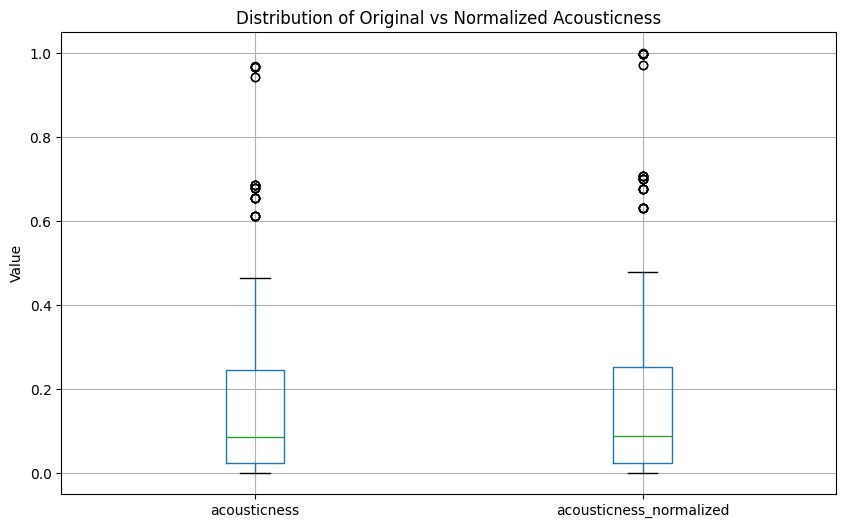

In [30]:
# Visualize original vs normalized acousticness
acoustic_features = ['acousticness', 'acousticness_normalized']
print("\nAcousticness Sample:")
print(df[acoustic_features].sample(5))

print("\nAcousticness Summary:")
print(df[acoustic_features].describe())

plt.figure(figsize=(10, 6))
df[acoustic_features].boxplot()
plt.title('Distribution of Original vs Normalized Acousticness')
plt.ylabel('Value')
plt.show()

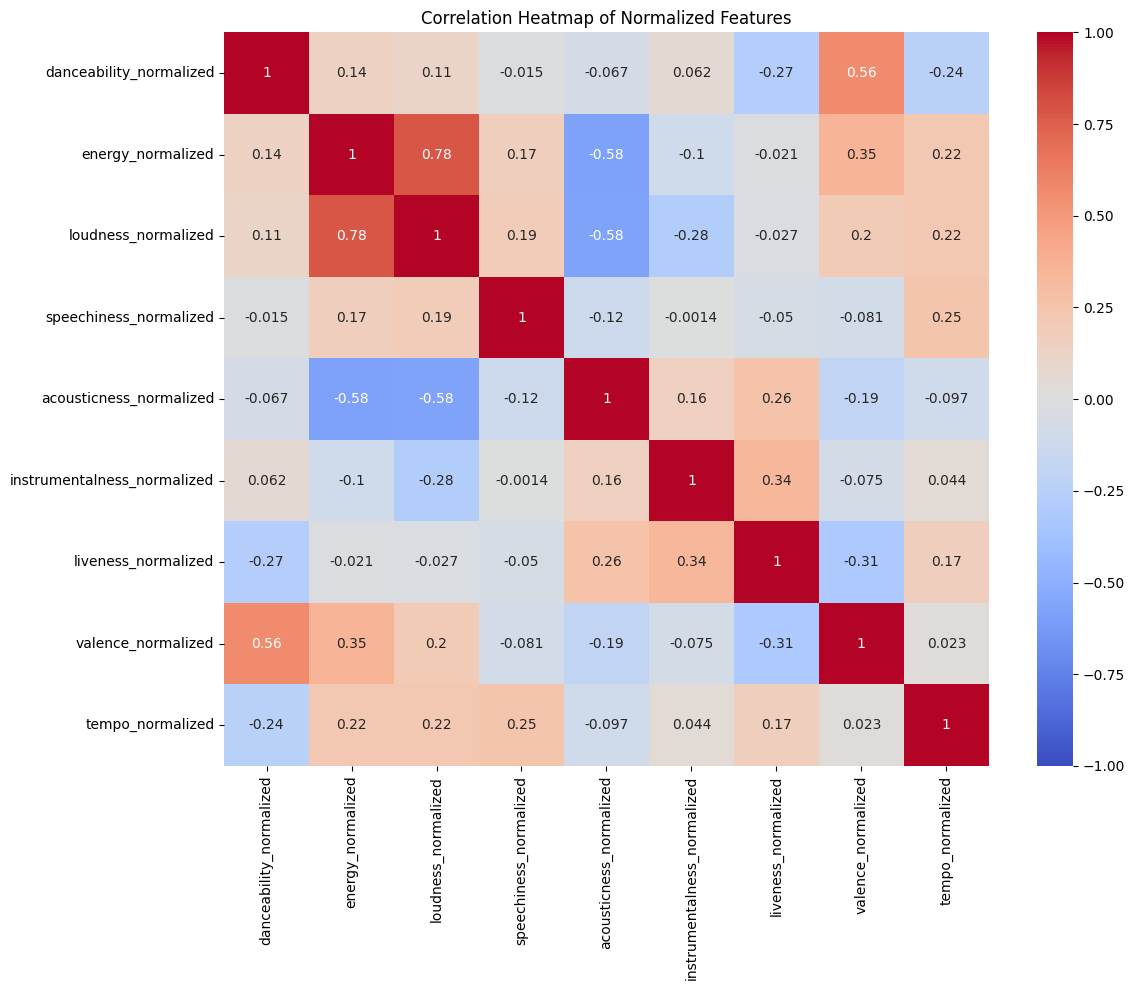

Notebook execution completed.


In [32]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Normalized Features')
plt.tight_layout()
plt.show()

print("Notebook execution completed.")